In [144]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [145]:
#Cargar conjunto de datos y personalizar columnas
empleados=pd.read_csv("HR_Employee_UNIR_01.csv",sep=",",header=0)

empleados.columns=["edad","desercion","frecuencia_viaje","tarifa_diaria","departamento",
                   "distancia_a_casa","educacion","campo_estudio","numero_empleados","identificador_empleado",
                   "satifaccion_empleado","sexo","tasa_por_hora","nivel_involucramiento", "nivel_trabajo","rol_empleado",
                   "satifaccion_Trabajo","estado_civil","ingreso_mensual","tasa_Salario_mensual","numero_empresa_trabajo",
                   "mayor_18","trabajan_horas_extras","porcentaje_aumento_salario","calificacion_desempeño","satifacccion_empleado_relacion",
                   "hora_trabajo_estandar","nivel_existencia_empleado","tiempo_trabajando","tiempo_formacion_empleado","percepcion_laboral_empleado",
                   "tiempo_empresa","puesto_actual_empleado","tiempo_empleado_promocion","tiempo_trabajo_gerente"]



In [146]:
#Con fines educativos y para un mejor entendimiento se realizó conversiones al español
sexo_esp={"Female":"Femenino",
          "Male":"Masculino"}
empleados["sexo"].replace(sexo_esp,inplace=True)

frecuencia_viaje_esp={"Travel_Rarely":"Viaja rara vez",
          "Travel_Frequently":"Viaja frecuentemente",
           "Non-Travel":"No viaja"          }
empleados["frecuencia_viaje"].replace(frecuencia_viaje_esp,inplace=True)

departamento={"Sales":"Ventas",
          "Research & Development":"Investigación y Desarrollo",
           "Human Resources":"Recursos Humanos"          }
empleados["departamento"].replace(departamento,inplace=True)

campo_estudio={"Life Sciences":"Ciencias de la Vida",
          "Other":"Otros",
           "Medical":"Medicina",          
            "Marketing":"Mercadotecnia",          
              "Marketing":"Mercadotecnia", 
               "Technical Degree":"Grado Técnico",
               "Human Resources":"Recursos Humanos"
              }
empleados["campo_estudio"].replace(campo_estudio,inplace=True)

desercion={"Yes":"Si"}
empleados["desercion"].replace(desercion,inplace=True)



rol_Empleado={"Sales Executive":"Ejecutivo de ventas",
          "Research Scientist":"Científico de investigación",
           "Laboratory Technician":"Técnico de Laboratorio",          
            "Manufacturing Director":"Director de Manufactura ",          
              "Healthcare Representative":"Representante Médico", 
               "Manager":"Gerente",
               "Sales Representative":"Representante de ventas",
              "Research Director":"Director de investigación",
              "Human Resources":"Recursos Humanos",
              }
empleados["rol_empleado"].replace(rol_Empleado,inplace=True)


estado_civil={"Single":"Soltero",
          "Married":"Casado",
           "Divorced":"Divorciado"          }
empleados["estado_civil"].replace(estado_civil,inplace=True)

trabajan_horas_extras={"Yes":"Si"}
empleados["trabajan_horas_extras"].replace(trabajan_horas_extras,inplace=True)


In [79]:
#Listar las 5 primeras filas para un primer vistazo del conjunto de datos
empleados.head(5)

,edad,desercion,frecuencia_viaje,tarifa_diaria,departamento,distancia_a_casa,educacion,campo_estudio,numero_empleados,identificador_empleado,...,satifacccion_empleado_relacion,hora_trabajo_estandar,nivel_existencia_empleado,tiempo_trabajando,tiempo_formacion_empleado,percepcion_laboral_empleado,tiempo_empresa,puesto_actual_empleado,tiempo_empleado_promocion,tiempo_trabajo_gerente
0,41,Si,Viaja rara vez,1102,Ventas,1,2,Ciencias de la Vida,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Viaja frecuentemente,279,Investigación y Desarrollo,8,1,Ciencias de la Vida,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Si,Viaja rara vez,1373,Investigación y Desarrollo,2,2,Otros,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Viaja frecuentemente,1392,Investigación y Desarrollo,3,4,Ciencias de la Vida,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Viaja rara vez,591,Investigación y Desarrollo,2,1,Medicina,1,7,...,4,80,1,6,3,3,2,2,2,2


In [80]:
#A continuación se describe un resumen estadistico de las variables categoricas
describe = empleados.describe(include=['O'])
describe

,desercion,frecuencia_viaje,departamento,campo_estudio,sexo,rol_empleado,estado_civil,mayor_18,trabajan_horas_extras
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Viaja rara vez,Investigación y Desarrollo,Ciencias de la Vida,Masculino,Ejecutivo de ventas,Casado,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [81]:
#Resumen estadistico de las variables númericas
empleados.describe()

,edad,tarifa_diaria,distancia_a_casa,educacion,numero_empleados,identificador_empleado,satifaccion_empleado,tasa_por_hora,nivel_involucramiento,nivel_trabajo,...,satifacccion_empleado_relacion,hora_trabajo_estandar,nivel_existencia_empleado,tiempo_trabajando,tiempo_formacion_empleado,percepcion_laboral_empleado,tiempo_empresa,puesto_actual_empleado,tiempo_empleado_promocion,tiempo_trabajo_gerente
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [82]:
#Un vistazo de los diferentes tipos de las variables categoricas
for column in empleados.select_dtypes(include=['object']):
    print(column)
    print(empleados[column].unique())
    print('-----------------------------------')

desercion
['Si' 'No']
-----------------------------------
frecuencia_viaje
['Viaja rara vez' 'Viaja frecuentemente' 'No viaja']
-----------------------------------
departamento
['Ventas' 'Investigación y Desarrollo' 'Recursos Humanos']
-----------------------------------
campo_estudio
['Ciencias de la Vida' 'Otros' 'Medicina' 'Mercadotecnia' 'Grado Técnico'
 'Recursos Humanos']
-----------------------------------
sexo
['Femenino' 'Masculino']
-----------------------------------
rol_empleado
['Ejecutivo de ventas' 'Científico de investigación'
 'Técnico de Laboratorio' 'Director de Manufactura '
 'Representante Médico' 'Gerente' 'Representante de ventas'
 'Director de investigación' 'Recursos Humanos']
-----------------------------------
estado_civil
['Soltero' 'Casado' 'Divorciado']
-----------------------------------
mayor_18
['Y']
-----------------------------------
trabajan_horas_extras
['Si' 'No']
-----------------------------------


In [83]:
#Elimminados columnas que no aportan nigun valor a nuestro analisis
empleados.drop(['numero_empleados','identificador_empleado','mayor_18',
                'tasa_Salario_mensual','hora_trabajo_estandar'], axis=1, inplace=True)

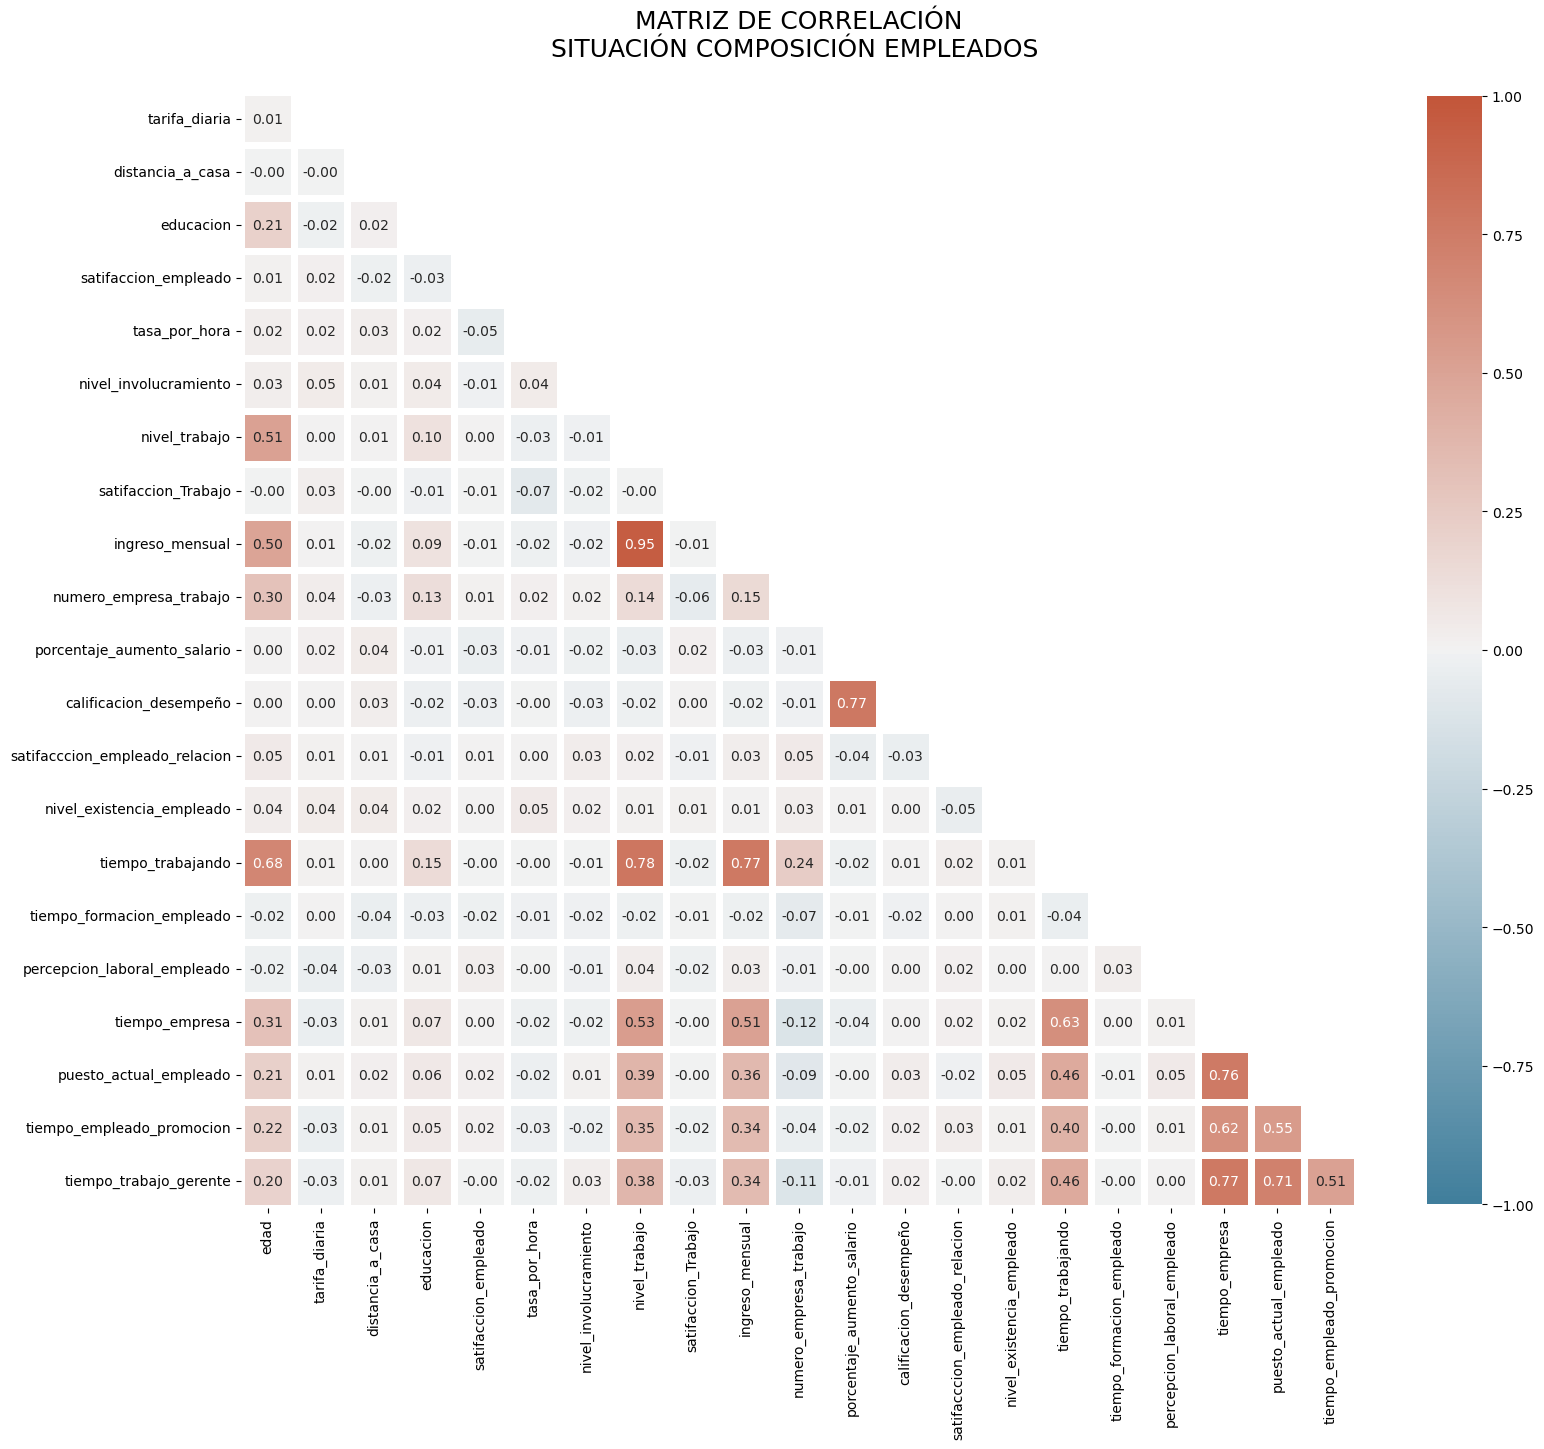

In [84]:
# Matriz de correlacion que muestra la situacion de los empleados
matriz_p=empleados.corr()
fig, ax = plt.subplots(figsize=(18, 18))

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(matriz_p, dtype=bool))
# Ajustar máscara y df
mask = mask[1:, :-1]
matriz = matriz_p.iloc[1:,:-1].copy()

# Generar un mapa de colores divergente personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(matriz, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
#yticks = [i.upper() for i in corr.index]
#xticks = [i.upper() for i in corr.columns]
#plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
#plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'MATRIZ DE CORRELACIÓN\nSITUACIÓN COMPOSICIÓN EMPLEADOS \n'
plt.title(title, loc='center', fontsize=18)
plt.show()

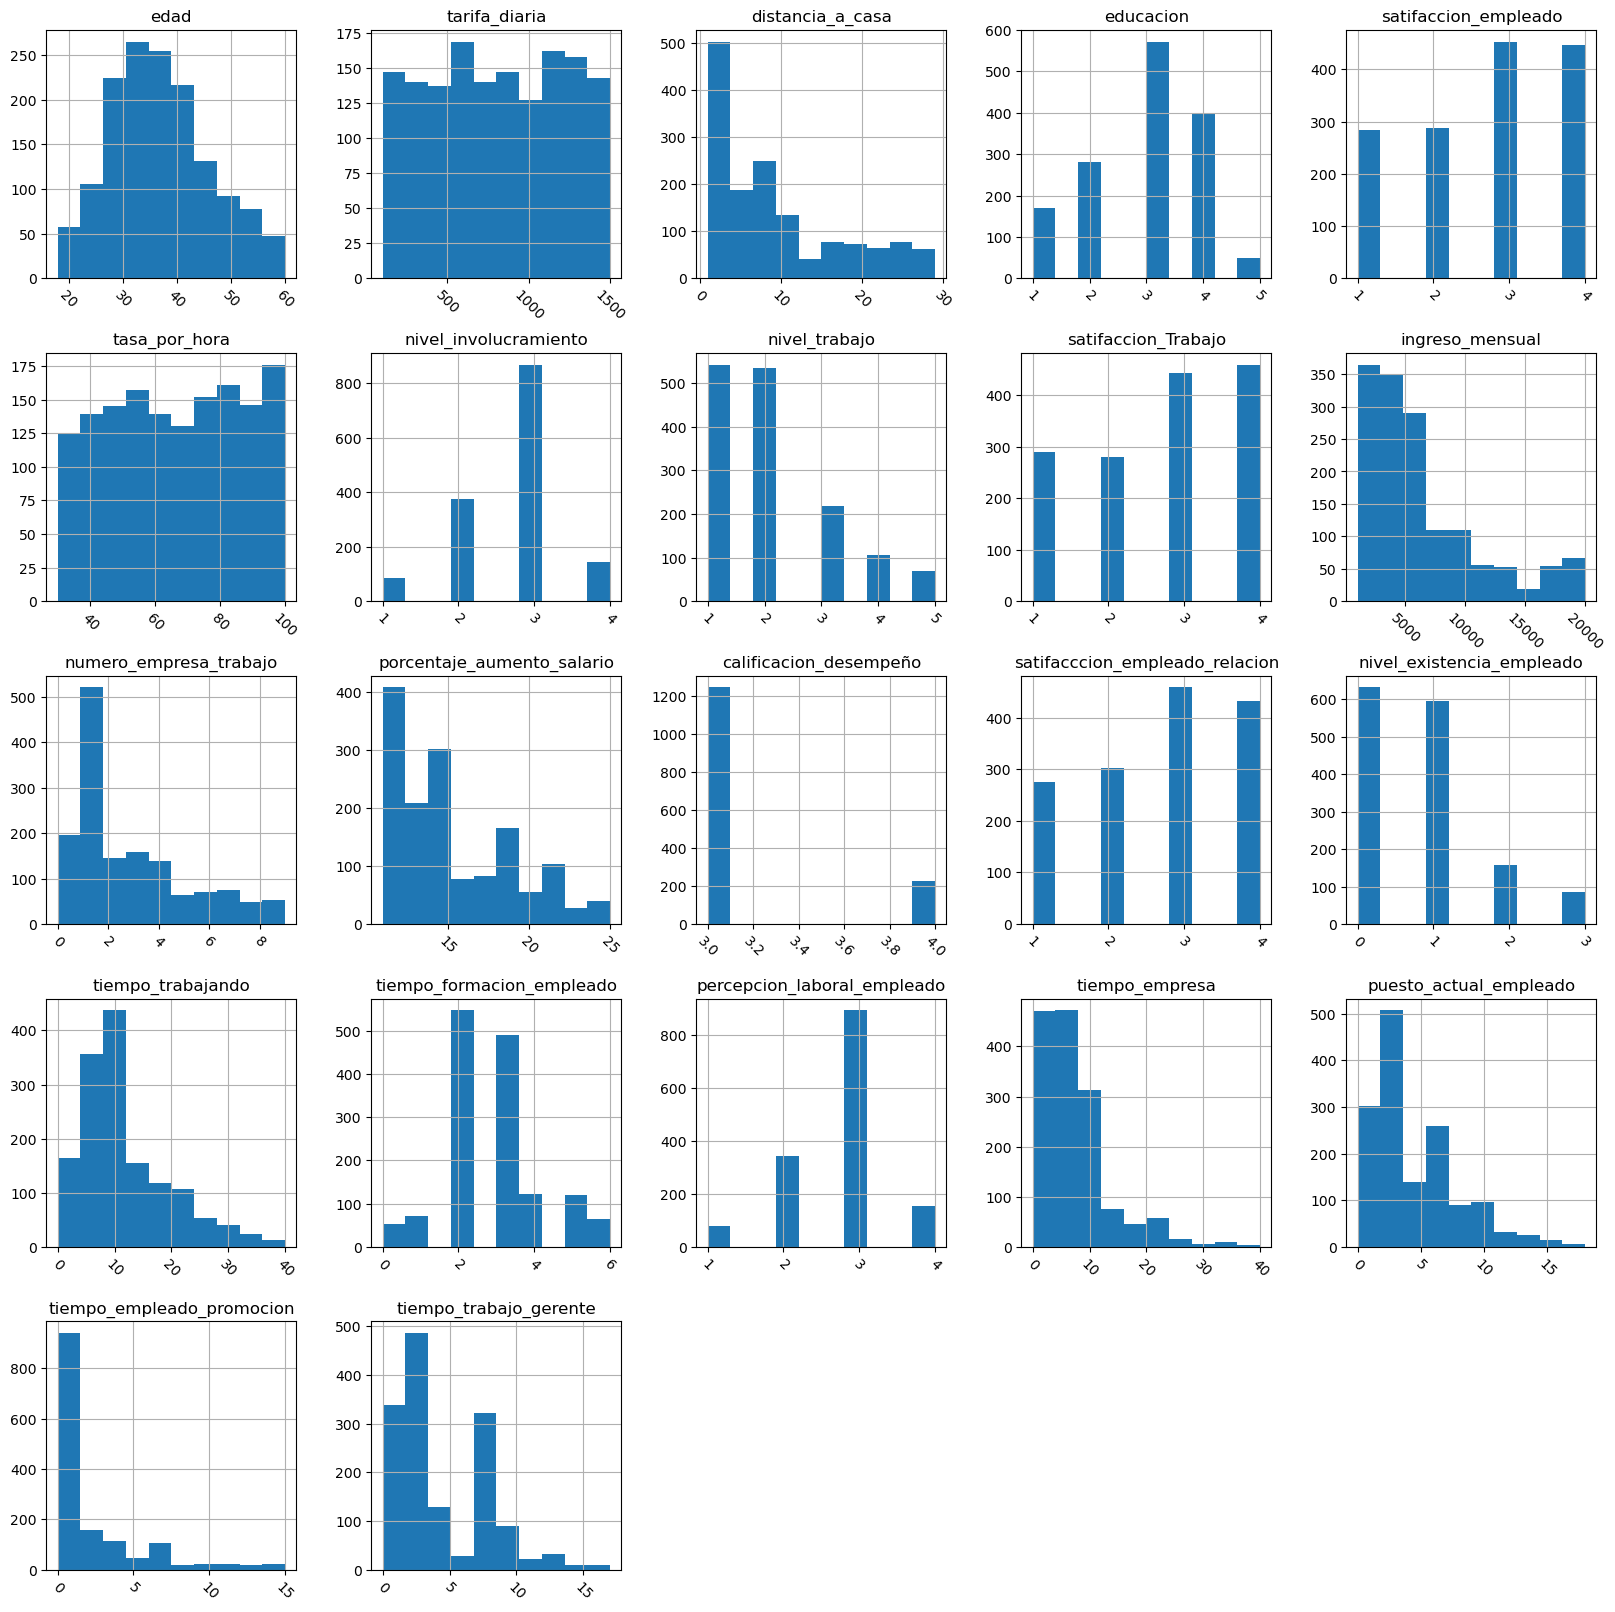

In [85]:
#Visualización de la distribución de los datos para cada característica
empleados.hist(figsize=(20,20), xrot=-45)
plt.show()

In [86]:
#Cantidad y distribución de deserciones 
fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type":"xy"},{"type":"domain"}]],
                    subplot_titles= ("Cantidad de deserciones", "Distribución de deserciones"))

fig.add_trace(go.Bar(x = empleados['desercion'].value_counts(),
                     y = ['Empleados que se quedaron', 'Empleados que se fueron'],
                     orientation = 'h',
                     opacity=0.8),
                     row=1,col=1)

fig.add_trace(go.Pie(values=empleados['desercion'].value_counts(),
                    opacity=0.8),
                    row=1, col=2)
fig.update_layout(height=400, showlegend=False)

fig.show()

In [87]:
#Elaboracion de una funcion que permita analizar las columnas categoricas
def analisis_columnas_categoricas(nombre_columna):

  
    #colors=sns.color_palette('Set3')
    colors= sns.color_palette("Paired")
 
    f,ax = plt.subplots(1,2, figsize=(16,4))
    
    empleados[nombre_columna].value_counts().plot.pie(
        autopct='%1.1f%%',
        ax=ax[0],
        shadow=True,       
        colors=colors       
        )
    
    ax[0].set_title(f'Tasa de empleados por {nombre_columna}')

    chart=sns.countplot(x=nombre_columna, hue="desercion",data=empleados, ax=ax[1], palette=colors)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90
                       
                         )
    ax[1].set_title(f'Deserción por {nombre_columna}')
    ax[1].set_xlabel(f'{nombre_columna}')
    ax[1].set_ylabel('Cantidad')


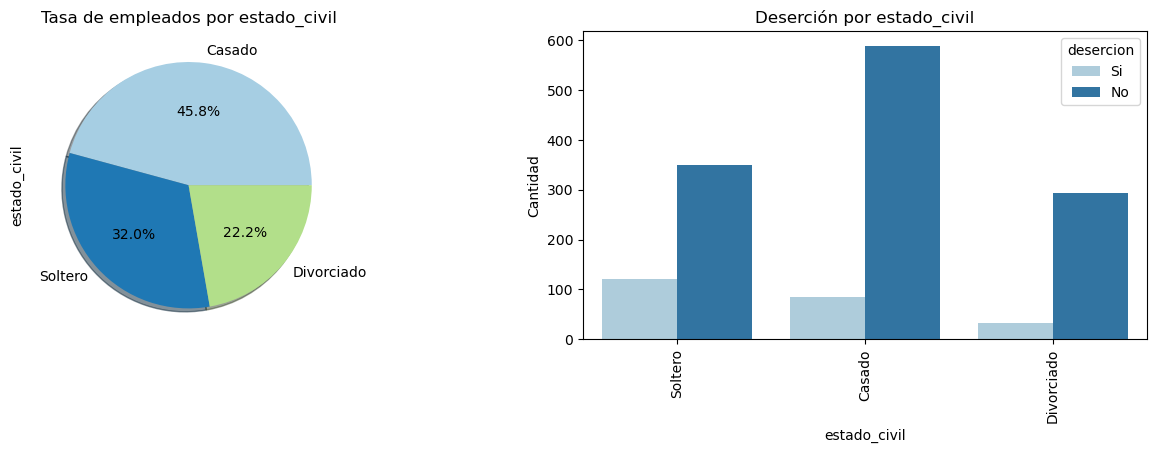

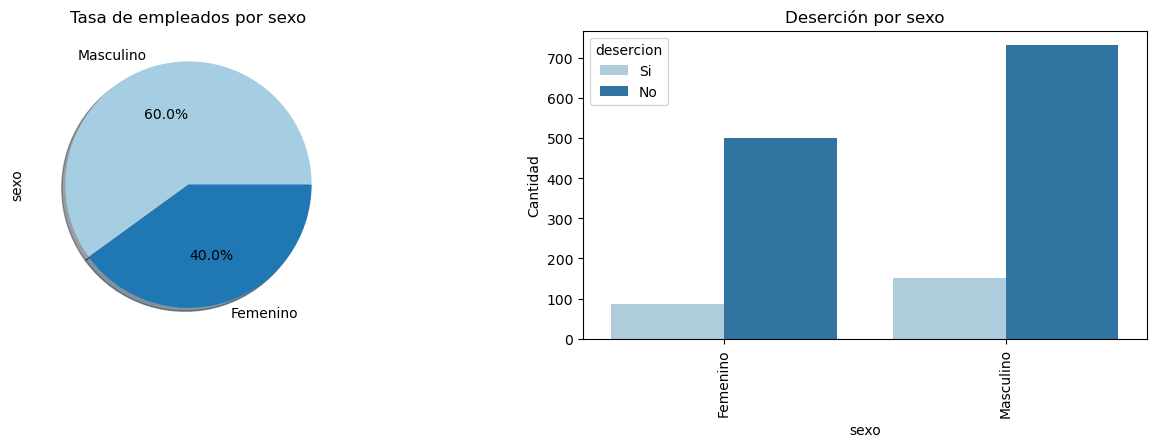

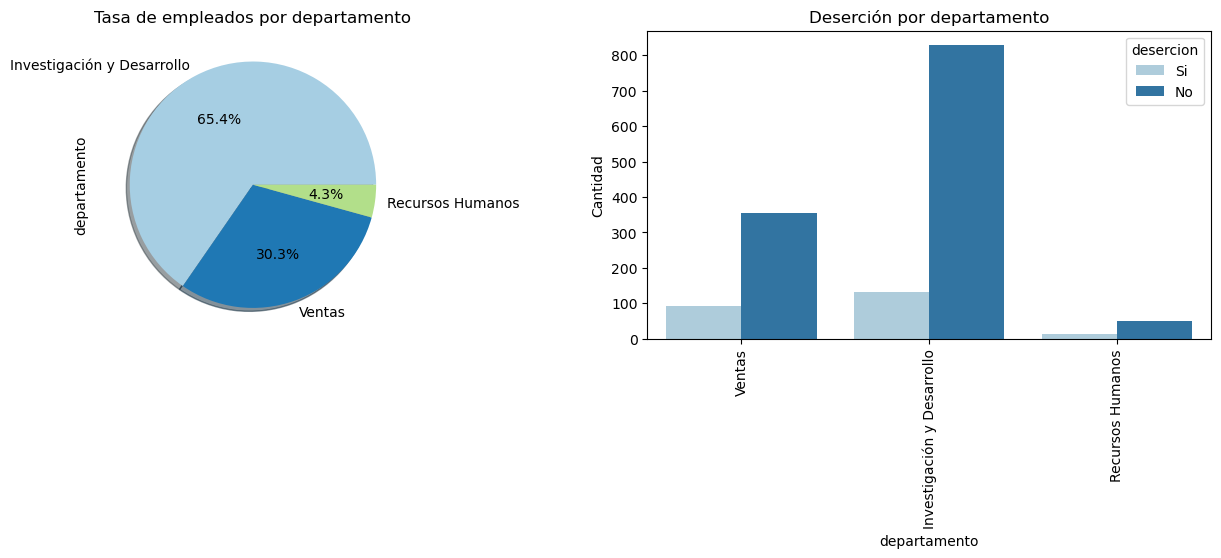

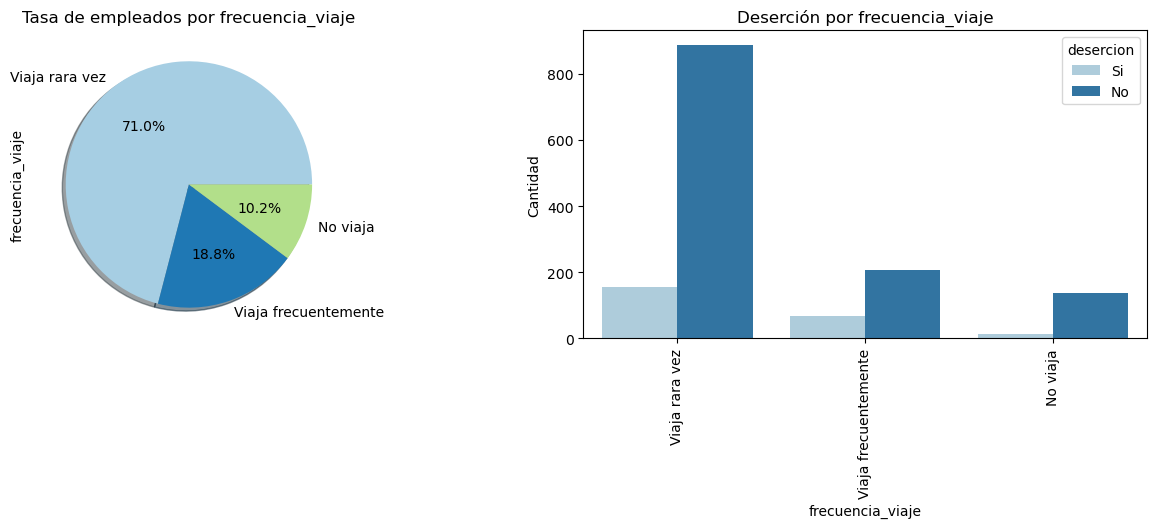

In [88]:
analisis_columnas_categoricas("estado_civil")
analisis_columnas_categoricas("sexo")
analisis_columnas_categoricas("departamento")
analisis_columnas_categoricas("frecuencia_viaje")


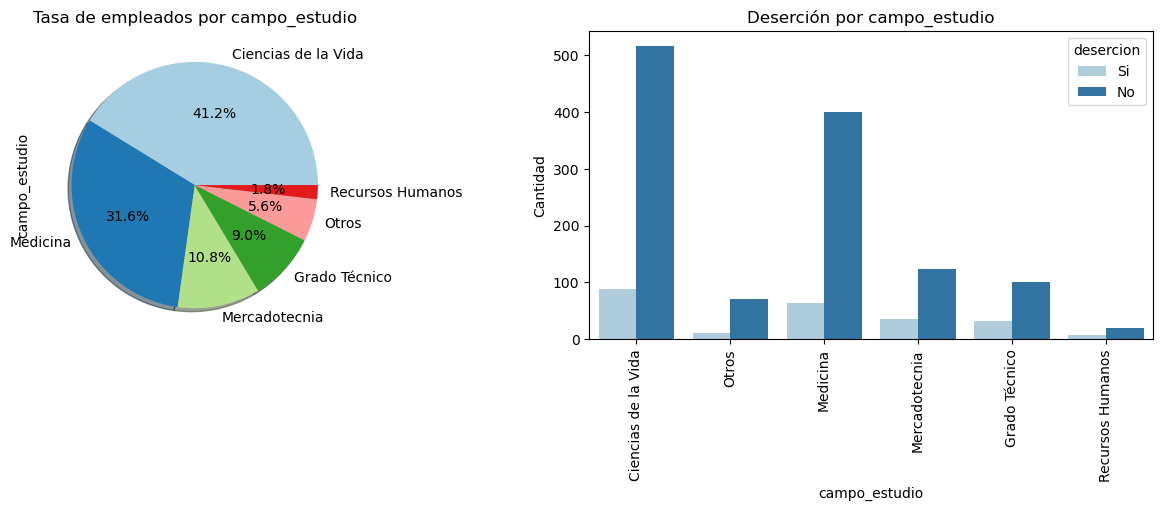

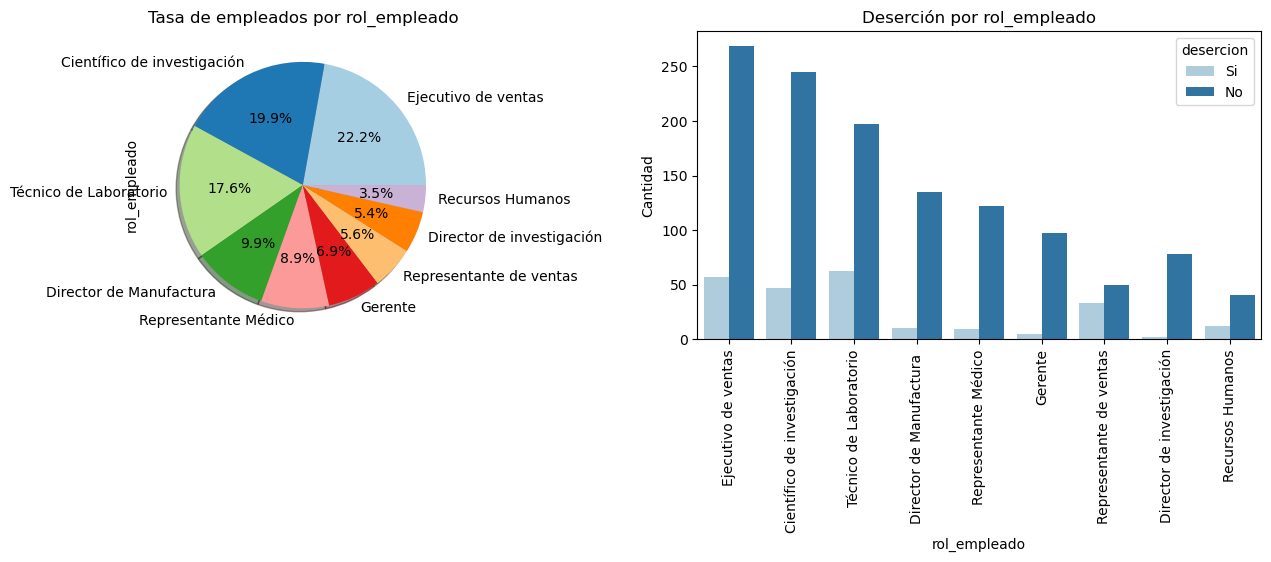

In [89]:
analisis_columnas_categoricas("campo_estudio")
analisis_columnas_categoricas("rol_empleado")

In [90]:
#Elaboracion de una funcion que permita analizar las columnas númericas
def analisis_columnas_numericas(nombre_columna):
    colors= sns.color_palette("Paired")
    f,ax = plt.subplots(1,2, figsize=(18,6))
    
    ax[0].set_title(f'Distribución de deserción por  {nombre_columna}   - Diagrama de densidad')
        
    sns.kdeplot(data=empleados, x=nombre_columna, hue="desercion",ax=ax[0],shade=True ,color=colors)
    sns.boxplot(y=nombre_columna, x='desercion',hue="desercion",data=empleados, palette=colors, ax=ax[1])
    ax[1].set_title(f'Distribución de deserción por  {nombre_columna} - Diagrama de caja ')

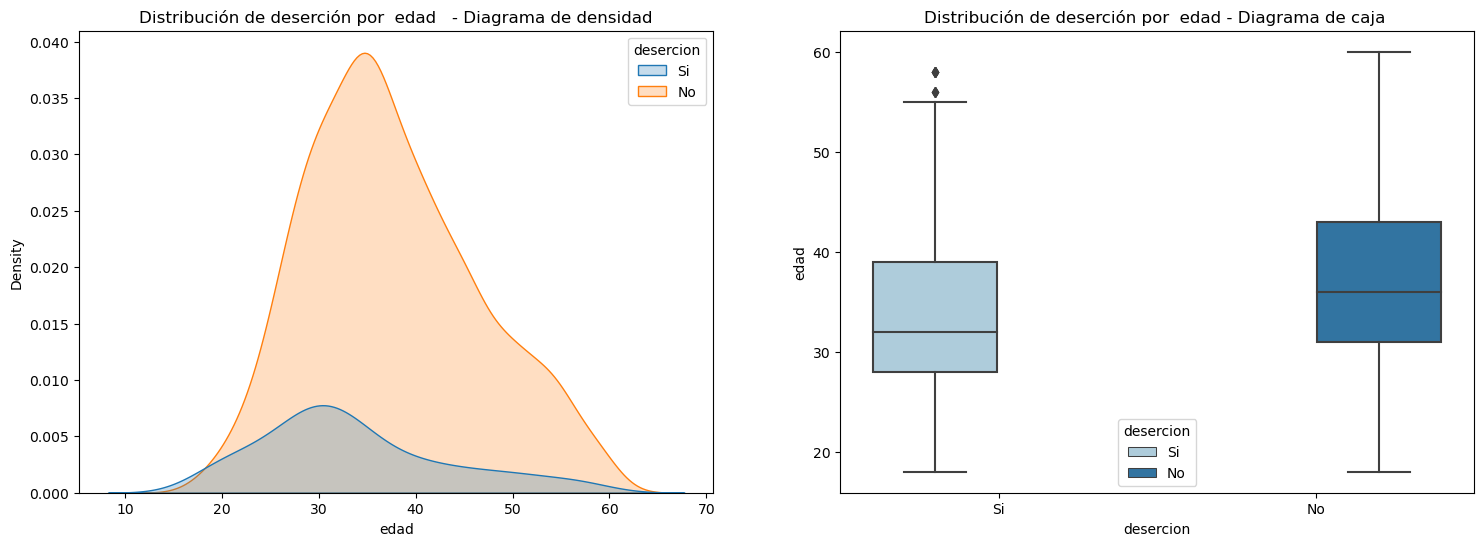

In [91]:
analisis_columnas_numericas("edad")

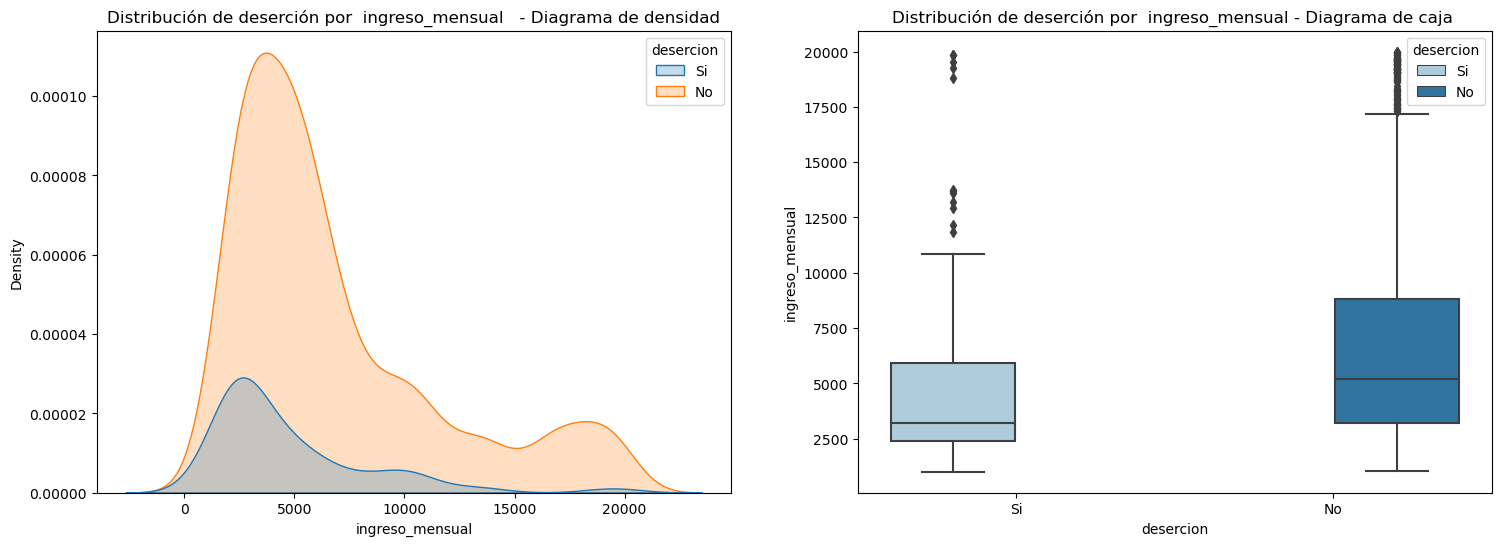

In [92]:
analisis_columnas_numericas("ingreso_mensual")

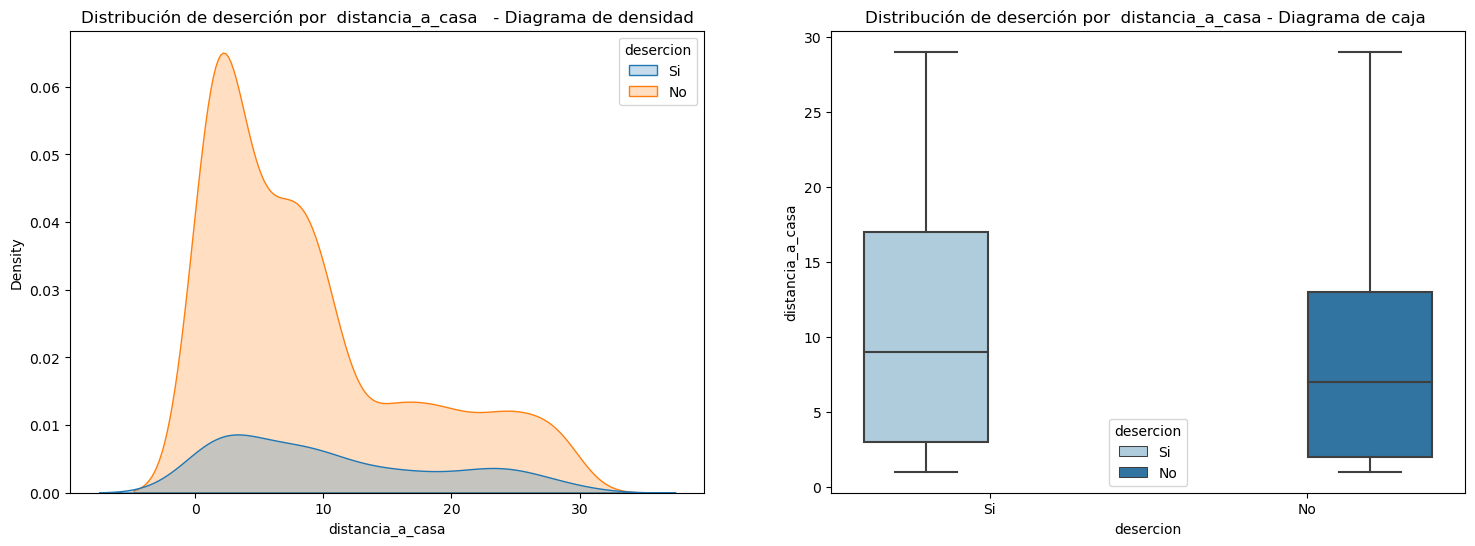

In [93]:
analisis_columnas_numericas("distancia_a_casa")

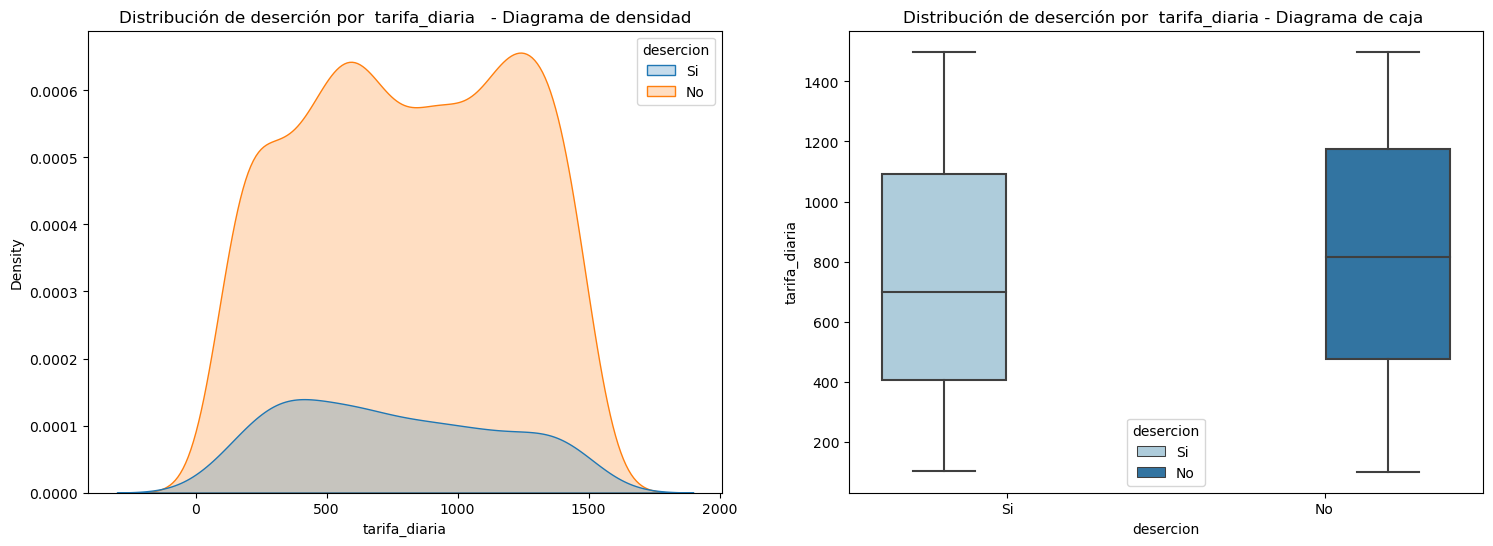

In [94]:
analisis_columnas_numericas("tarifa_diaria")

In [95]:
#Elaboracion de una funcion que permita comparar las variables númericas y variables categoricas
def comparacion_numerica_categorica(numerical_col, caterical_col1, caterical_col2):
    size=3
    colors= sns.color_palette("Paired")
    f,ax = plt.subplots(1,2, figsize=(18,6))
    
    g1= sns.swarmplot( x=caterical_col1, y=numerical_col,hue='desercion', data=empleados, dodge=True, ax=ax[0], palette=colors, size=size)
    ax[0].set_title(f'{numerical_col} vs {caterical_col1} separado por cantidad de deserción')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=45) 

    
    g2 = sns.swarmplot( x=caterical_col2, y=numerical_col,hue='desercion', data=empleados, dodge=True, ax=ax[1], palette=colors, size=size)
    ax[1].set_title(f'{numerical_col} vs {caterical_col2} separado por cantidad de deserción')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=45) 

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

14.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



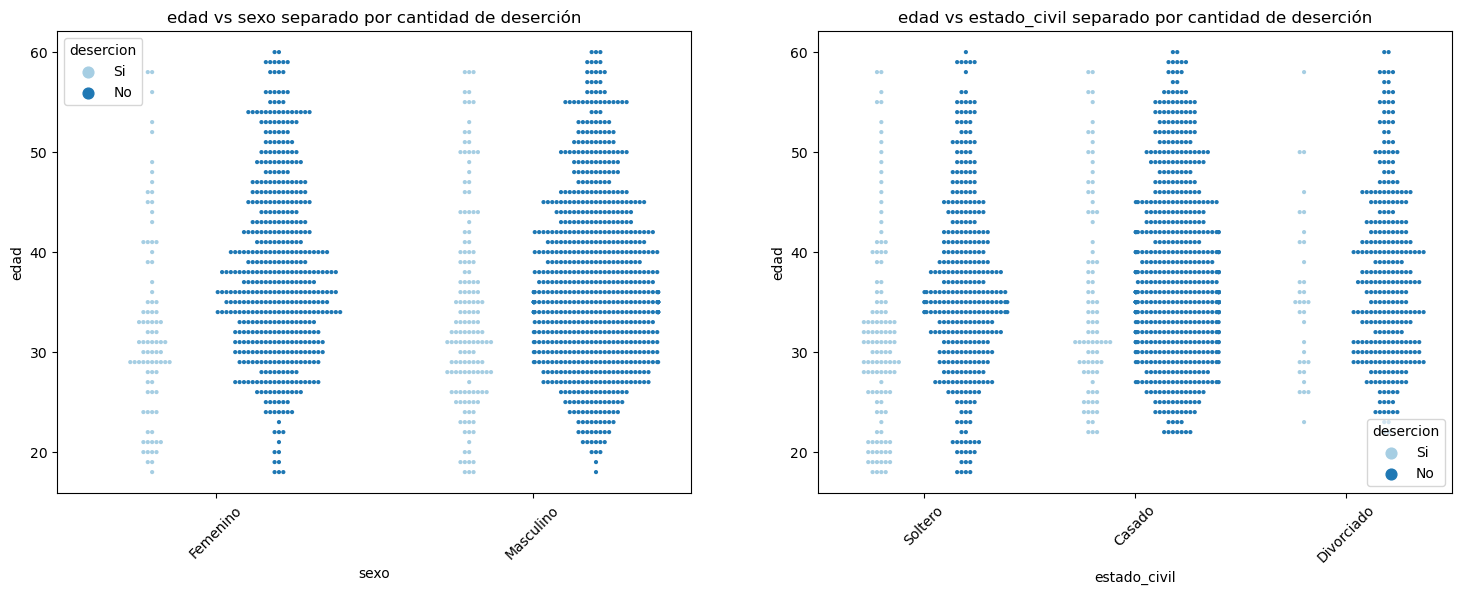

In [96]:
 comparacion_numerica_categorica("edad","sexo","estado_civil")

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\rober\anaconda3\lib\site-package

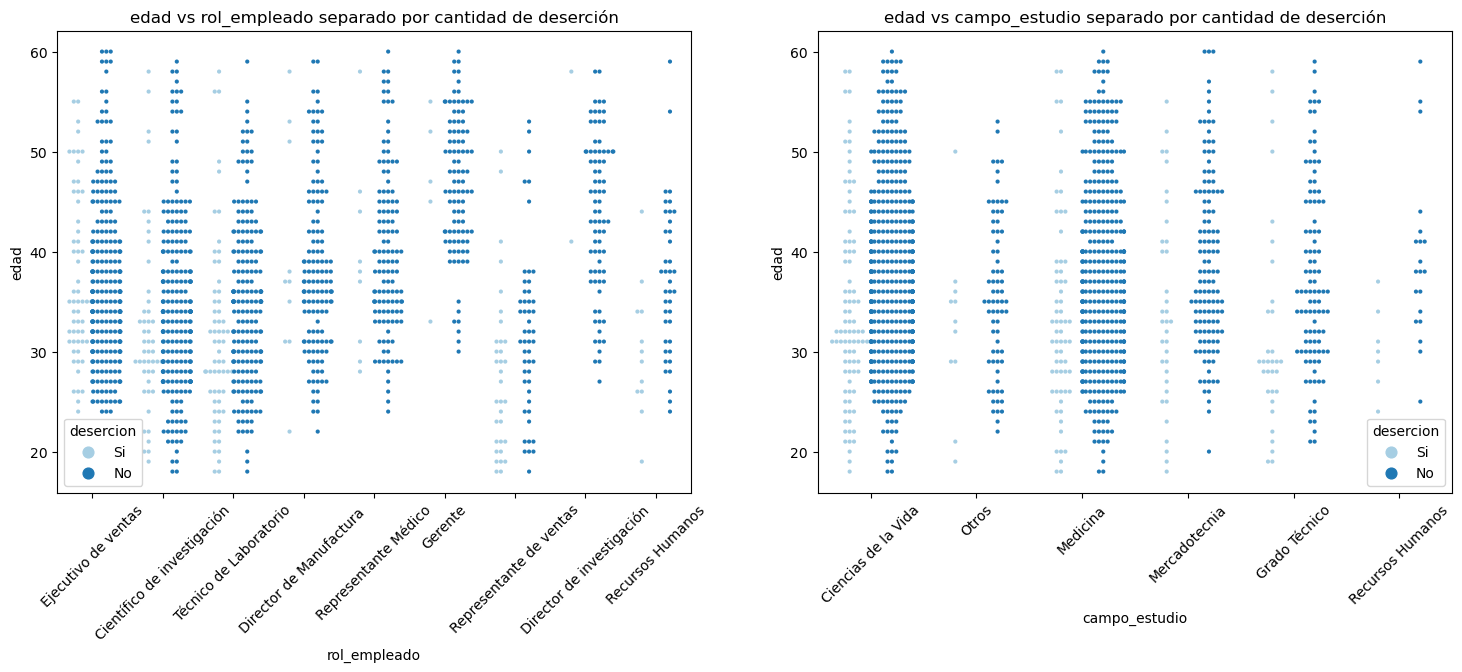

In [97]:
comparacion_numerica_categorica('edad','rol_empleado','campo_estudio')

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



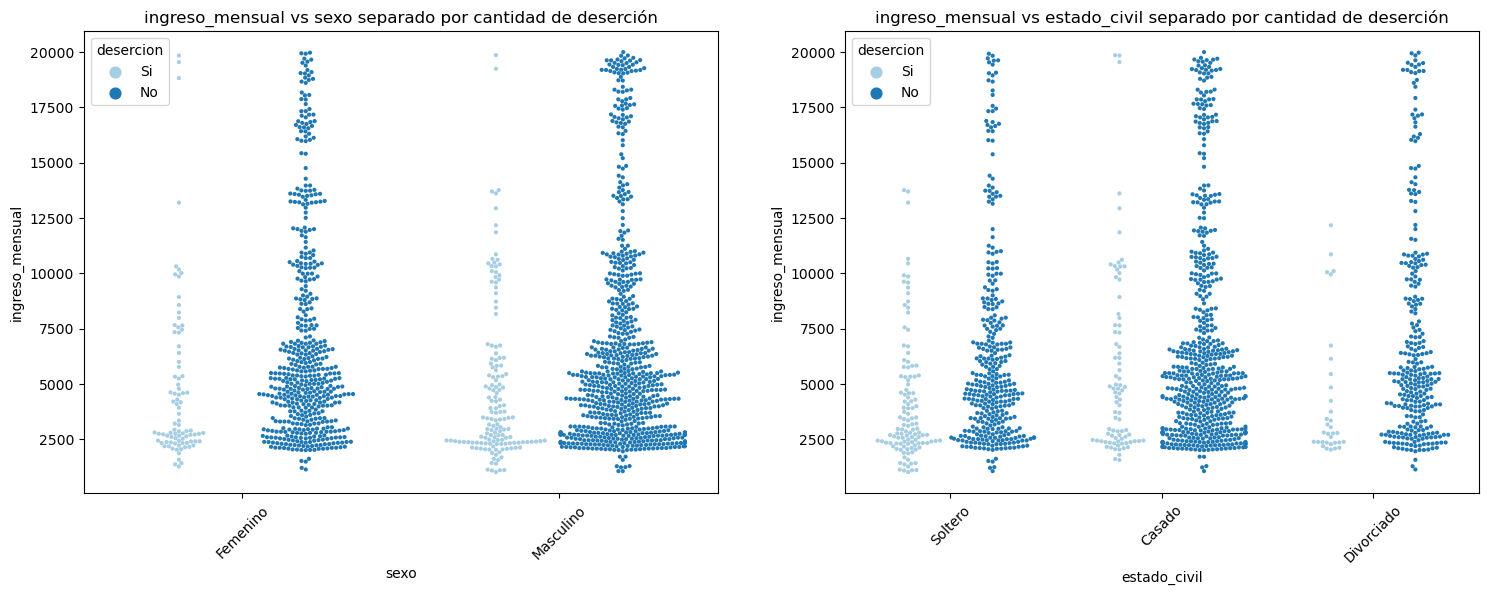

In [98]:
comparacion_numerica_categorica('ingreso_mensual','sexo','estado_civil')

## Preparación de los datos 

In [99]:
#Las columnas de deserción indican "Sí" si el empleado renunció al trabajo y "No" el empleado se quedó en la empresa. 
#Deberíamos convertir este 1 y 0 para usarlo en el modelo de aprendizaje automático.
#Las horas extras también tienen Sí y NO. Entonces necesitamos convertir esta columna a 1 y 0.
empleados['desercion'] = empleados['desercion'].apply(lambda x:1 if x == "Si" else 0 )
empleados['trabajan_horas_extras'] = empleados['trabajan_horas_extras'].apply(lambda x:1 if x =="Si" else 0 )
empleados['sexo'] = empleados['sexo'].apply(lambda x:1 if x=='Femenino' else 0)

In [100]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   edad                            1470 non-null   int64 
 1   desercion                       1470 non-null   int64 
 2   frecuencia_viaje                1470 non-null   object
 3   tarifa_diaria                   1470 non-null   int64 
 4   departamento                    1470 non-null   object
 5   distancia_a_casa                1470 non-null   int64 
 6   educacion                       1470 non-null   int64 
 7   campo_estudio                   1470 non-null   object
 8   satifaccion_empleado            1470 non-null   int64 
 9   sexo                            1470 non-null   int64 
 10  tasa_por_hora                   1470 non-null   int64 
 11  nivel_involucramiento           1470 non-null   int64 
 12  nivel_trabajo                   1470 non-null   

In [101]:
empleados['total_satisfaccion'] = (empleados['satifaccion_empleado'] + 
                                     empleados['nivel_involucramiento'] + 
                                     empleados['satifaccion_Trabajo'] + 
                                     empleados['satifacccion_empleado_relacion'] +
                                     empleados['percepcion_laboral_empleado']) /5 

In [102]:
# Se eliminan columnas que servieron para la creacion de la columna total_satuisfaccion
empleados.drop(['satifaccion_empleado','nivel_involucramiento','satifaccion_Trabajo',
                'satifacccion_empleado_relacion','percepcion_laboral_empleado'], axis=1, inplace=True)

empleados.drop(['porcentaje_aumento_salario'], axis=1, inplace=True)


In [103]:
#De la columna satifacción total es más probable que abandone el trabajo si el indice es mayor de 2.2
empleados['total_satisfaccion_bool'] = empleados['total_satisfaccion'].apply(lambda x:1 if x>=2.2 else 0 ) 
empleados.drop('total_satisfaccion', axis=1, inplace=True)

In [104]:
#De la columna edad se infiere la probabilidad que abandone el trabajo antes de los 35 años
empleados['edad_bool'] = empleados['edad'].apply(lambda x:1 if x<35 else 0)
empleados.drop('edad', axis=1, inplace=True)

In [105]:
#Columna de tasa diaria es más probable que abandone el trabajo si la tasa diaria es inferior a 750
empleados['tarifa_diaria_bool'] = empleados['tarifa_diaria'].apply(lambda x:1 if x<750 else 0)
empleados.drop('tarifa_diaria', axis=1, inplace=True)

In [106]:
#Columna del Departamento es más probable que abandone el trabajo si el empleado trabaja en el Departamento de Ventas
empleados['departamento_bool'] = empleados['departamento'].apply(lambda x:1 if x=='Sales' else 0)
empleados.drop('departamento', axis=1, inplace=True)

In [107]:
# La columna Distancia desde el hogar es más probable que abandone el trabajo si el empleado recorre más de 10
empleados['distancia_a_casa_bool'] = empleados['distancia_a_casa'].apply(lambda x:1 if x>10 else 0)
empleados.drop('distancia_a_casa', axis=1, inplace=True)

In [108]:
#La columna por hora es más probable que abandone el trabajo si el empleado trabaja a una tarifa por hora inferior a 65
empleados['tasa_por_hora_bool'] = empleados['tasa_por_hora'].apply(lambda x:1 if x<65 else 0)
empleados.drop('tasa_por_hora', axis=1, inplace=True)

In [109]:
#La columna rol del empleado es probable que el empleado abandone el trabajo si asume el rol de ejecutivo de ventas.
empleados['rol_empleado_bool'] = empleados['rol_empleado'].apply(lambda x:1 if x=='Ejecutivo de ventas' else 0)
empleados.drop('rol_empleado', axis=1, inplace=True)

In [110]:
#De la columna ingreso mensual es probable que el empleado abandone la empresa si su salario es inferior a 3500
empleados['ingreso_mensual_bool'] = empleados['ingreso_mensual'].apply(lambda x:1 if x<3500 else 0)
empleados.drop('ingreso_mensual', axis=1, inplace=True)

In [111]:
#De la columna total de años trabajado es probable que el empleado abandone la empresa si es menor de 8
empleados['tiempo_trabajando_bool'] = empleados['tiempo_trabajando'].apply(lambda x:1 if x<8 else 0)
empleados.drop('tiempo_trabajando', axis=1, inplace=True)

In [112]:
#De la columna años en la empresa es probable que el empleado abandone la empresa si es menor de 3
empleados['tiempo_empresa_bool'] = empleados['tiempo_empresa'].apply(lambda x:1 if x<3 else 0)
empleados.drop('tiempo_empresa', axis=1, inplace=True)

In [113]:
#De la columna años rol actual es probable que el empleado abandone la empresa si los años es menor a 3
empleados['puesto_actual_empleado_bool'] = empleados['puesto_actual_empleado'].apply(lambda x:1 if x<3 else 0)
empleados.drop('puesto_actual_empleado', axis=1, inplace=True)

In [114]:
#De la columna años de la última promocion es probable que el empleado abandone la empres si los años es menor a 1
empleados['tiempo_empleado_promocion_bool'] = empleados['tiempo_empleado_promocion'].apply(lambda x:1 if x<1 else 0)
empleados.drop('tiempo_empleado_promocion', axis=1, inplace=True)

In [115]:
#De la columna años con el gerente actual podemos inferir que el empleado abandone la empresa si los años es menor a 1
empleados['tiempo_trabajo_gerente_bool'] = empleados['tiempo_trabajo_gerente'].apply(lambda x:1 if x<1 else 0)
empleados.drop('tiempo_trabajo_gerente', axis=1, inplace=True)

In [116]:
convert_category = ['frecuencia_viaje','educacion','campo_estudio','estado_civil','nivel_existencia_empleado','trabajan_horas_extras','sexo','tiempo_formacion_empleado']
for col in convert_category:
        empleados[col] = empleados[col].astype('category')

In [117]:
#Columnas transformadas 
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   desercion                       1470 non-null   int64   
 1   frecuencia_viaje                1470 non-null   category
 2   educacion                       1470 non-null   category
 3   campo_estudio                   1470 non-null   category
 4   sexo                            1470 non-null   category
 5   nivel_trabajo                   1470 non-null   int64   
 6   estado_civil                    1470 non-null   category
 7   numero_empresa_trabajo          1470 non-null   int64   
 8   trabajan_horas_extras           1470 non-null   category
 9   calificacion_desempeño          1470 non-null   int64   
 10  nivel_existencia_empleado       1470 non-null   category
 11  tiempo_formacion_empleado       1470 non-null   category
 12  total_satisfaccion_b

## Crear cojunto de datos de prueba y entrenamiento y realizar limpieza de datos

In [118]:
#separar la columna categórica y numérica
X_categorical = empleados.select_dtypes(include=['category'])
X_numerical = empleados.select_dtypes(include=['int64'])

In [119]:
#Crear la colummna target 
y = empleados['desercion']

In [120]:
X_numerical.drop('desercion', axis=1, inplace=True)

In [121]:
#Aplicamos OneHotEncoder , las características de entrada categoricas son transformado en valores numéricos
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [122]:
#concatenar los valores categóricos y numéricos
X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,departamento_bool,distancia_a_casa_bool,tasa_por_hora_bool,rol_empleado_bool,ingreso_mensual_bool,tiempo_trabajando_bool,tiempo_empresa_bool,puesto_actual_empleado_bool,tiempo_empleado_promocion_bool,tiempo_trabajo_gerente_bool
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,1,0,1,0,0,0,0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,1,1,1,0,0


In [123]:
#Escalar los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\Users\rober\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [125]:
print(f"Forma de datos de entrenamiento: {X_train.shape}, Forma de datos de prueba: {X_test.shape}")

Forma de datos de entrenamiento: (1029, 48), Forma de datos de prueba: (441, 48)


## Clasificador de regresión lógistica


In [126]:
#import libraires
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()

model.fit(X_train, y_train)
model

LogisticRegression()

In [127]:
y_pred = model.predict(X_test)

In [128]:
print(f"Precisión de la regresión logística: %{100* accuracy_score(y_pred, y_test)}")

Precisión de la regresión logística: %87.52834467120182


Matriz de Regresión Logística 
[[360  16]
 [ 39  26]]


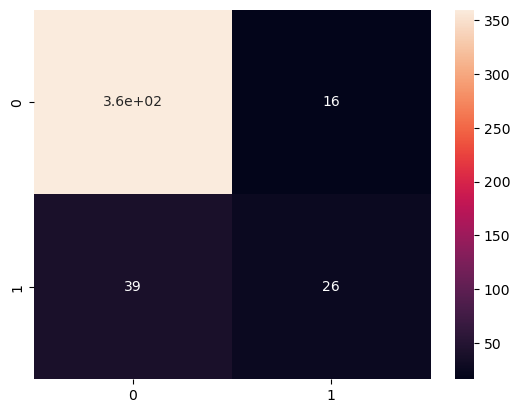

In [129]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print("Matriz de Regresión Logística ")
print(cm)

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       376
           1       0.62      0.40      0.49        65

    accuracy                           0.88       441
   macro avg       0.76      0.68      0.71       441
weighted avg       0.86      0.88      0.86       441



## Entrenar y evaluar un clasificador forestal aleatorio

In [131]:
from sklearn.ensemble import RandomForestClassifier

model_Ran = RandomForestClassifier()

model_Ran.fit(X_train, y_train)

y_pred_Ran = model_Ran.predict(X_test)

print(f"Precisión del modelo de bosque aleatorio: {accuracy_score(y_test, y_pred_Ran)}")


Precisión del modelo de bosque aleatorio: 0.8616780045351474


Matriz de Random Forest 
[[367   9]
 [ 52  13]]


<AxesSubplot:>

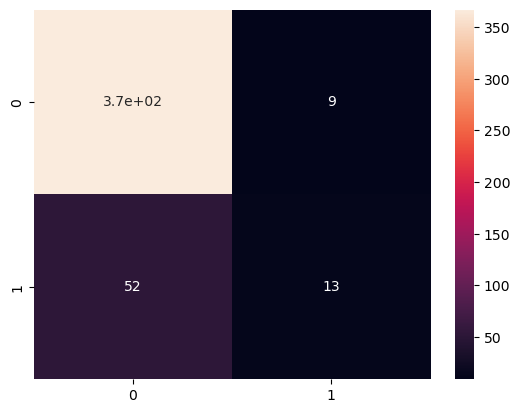

In [132]:
cm_Ran = confusion_matrix(y_test, y_pred_Ran)
print("Matriz de Random Forest ")
print(cm_Ran)
sns.heatmap(cm_Ran, annot=True)

In [133]:
print(classification_report(y_test, y_pred_Ran))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       376
           1       0.59      0.20      0.30        65

    accuracy                           0.86       441
   macro avg       0.73      0.59      0.61       441
weighted avg       0.83      0.86      0.83       441



## Entrenar y evaluar un Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print(f"Precisión del modelo de árboles de decisión:",metrics.accuracy_score(y_test, y_pred))


Precisión del modelo de árboles de decisión: 0.7845804988662132


Matriz de Decision Tree
[[319  57]
 [ 38  27]]


<AxesSubplot:>

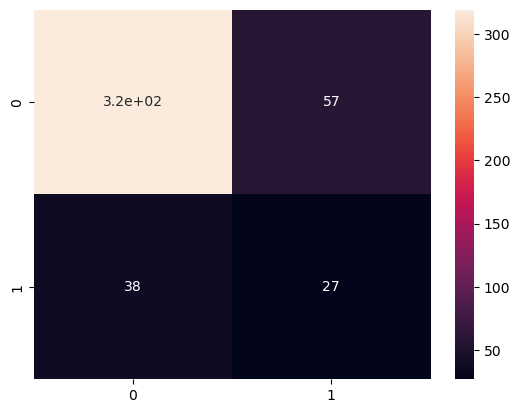

In [135]:
cm_Ran = confusion_matrix(y_test, y_pred)
print("Matriz de Decision Tree")
print(cm_Ran)
sns.heatmap(cm_Ran, annot=True)

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       376
           1       0.32      0.42      0.36        65

    accuracy                           0.78       441
   macro avg       0.61      0.63      0.62       441
weighted avg       0.81      0.78      0.80       441



## Entrenar y evaluar un Naive Bayes

In [137]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_n = nb.predict(X_test)

print(f"Precisión del modelo Naive Bayes: ",nb.score(X_test, y_pred_n))


Precisión del modelo Naive Bayes:  1.0


Matriz de Naive Bayes
[[293  83]
 [ 19  46]]


<AxesSubplot:>

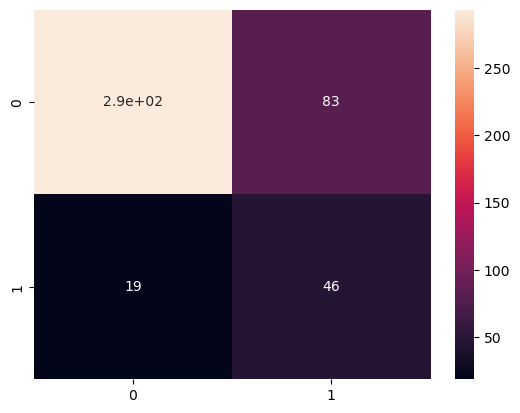

In [138]:
cm_Ran = confusion_matrix(y_test, y_pred_n)
print("Matriz de Naive Bayes")
print(cm_Ran)
sns.heatmap(cm_Ran, annot=True)

In [139]:
print(classification_report(y_test, y_pred_n))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       376
           1       0.36      0.71      0.47        65

    accuracy                           0.77       441
   macro avg       0.65      0.74      0.66       441
weighted avg       0.85      0.77      0.80       441



### Cálculo Roc Curva y conducción

Logistic ROC AUC:0.840
No Skill ROC AUC:0.500


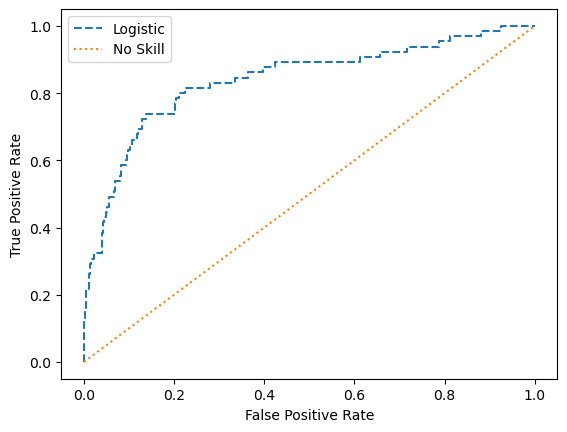

In [140]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#predict probabilities
y_probability = model.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability = y_probability[:,1]
## calculate scores
logistic_roc_score = roc_auc_score(y_test, y_probability)
print("Logistic ROC AUC:%.3f" %(logistic_roc_score) )

# generate a no skill prediction (majority class)
noskill_prob = [0 for _ in range(len(y_test))]
noskill_roc_auc = roc_auc_score(y_test,noskill_prob )
print("No Skill ROC AUC:%.3f" %(noskill_roc_auc))

#calculate the roc curve
lo_fpr, lo_tpr, _ =roc_curve(y_test, y_probability)
no_fpr, no_tpr, _ =roc_curve(y_test, noskill_prob)

plt.plot(lo_fpr, lo_tpr, linestyle='dashed', label ='Logistic')
plt.plot(no_fpr, no_tpr, linestyle='dotted', label= 'No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

No Skill ROC AUC:0.500
Logistic ROC AUC:0.840
Random Forest ROC AUC:0.808


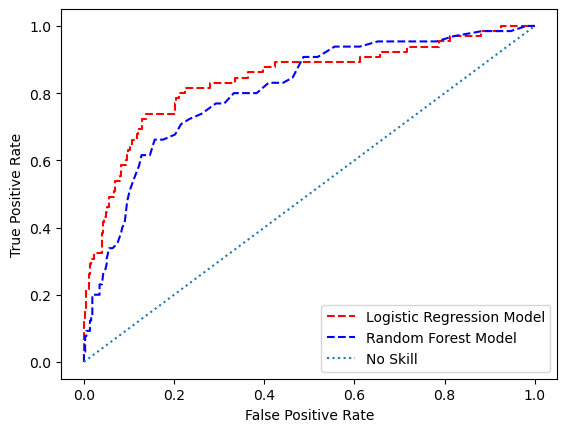

In [141]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
noskill_prob = [0 for _ in range(len(y_test))]
noskill_roc_auc = roc_auc_score(y_test,noskill_prob )
print("No Skill ROC AUC:%.3f" %(noskill_roc_auc))

#predict probabilities
y_probability = model.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability = y_probability[:,1]
## calculate scores
logistic_roc_score = roc_auc_score(y_test, y_probability)
print("Logistic ROC AUC:%.3f" %(logistic_roc_score) )



#Probabilities for random forest
y_probability_Ran = model_Ran.predict_proba(X_test)
#keep probabilities positive outcomes only
y_probability_Ran = y_probability_Ran[:,1]
## calculate scores
RandomF_roc_score = roc_auc_score(y_test, y_probability_Ran)
print("Random Forest ROC AUC:%.3f" %(RandomF_roc_score) )


#calculate the roc curve
lo_fpr, lo_tpr, _ =roc_curve(y_test, y_probability)
no_fpr, no_tpr, _ =roc_curve(y_test, noskill_prob)
ra_fpr, ra_tpr, _ =roc_curve(y_test, y_probability_Ran)


plt.plot(lo_fpr, lo_tpr, linestyle='dashed', color= 'r', label ='Logistic Regression Model')
plt.plot(ra_fpr, ra_tpr, linestyle='dashed', color= 'b', label= 'Random Forest Model')
plt.plot(no_fpr, no_tpr, linestyle='dotted', label= 'No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Probando múltiples modelos con validación cruzada

In [142]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV




kfold = KFold(n_splits=10, random_state=22,shuffle=True)
xyz= []
accuracy = []
std = []
y_pred_list = []


classifiers = ['Linear Svm',
              'Radical Svm',
              'Logistic Regression',
              'KNN',
              'Decision Tree',
              'Naive Bayes',
              'Random Forest',
              'XGBoost']

models = [svm.SVC(kernel='linear'),
         svm.SVC(kernel='rbf'),
         LogisticRegression(solver='liblinear'),
         KNeighborsClassifier(),
          DecisionTreeClassifier(),
          GaussianNB(),
          RandomForestClassifier(n_estimators=100),
          XGBClassifier()
        ]

for i in models:
    model = i 
    cv_result =cross_val_score(model, 
                               X_train, 
                               y_train, 
                               cv=kfold,
                              scoring='accuracy')
    y_pred = cross_val_predict(model, X, y, cv=10)
    y_pred_list.append(y_pred)
    cv_result =cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
    
    
    
new_model_data_frame =pd.DataFrame({'Cv Mean': xyz,
                                   'Std': std},
                                   index=classifiers)

new_model_data_frame

C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\rober\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

,Cv Mean,Std
Linear Svm,0.864925,0.031711
Radical Svm,0.854245,0.032996
Logistic Regression,0.869798,0.029749
KNN,0.843537,0.029907
Decision Tree,0.779383,0.029570
Naive Bayes,0.760965,0.031453
Random Forest,0.855226,0.032525
XGBoost,0.849372,0.030140


In [143]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd =GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)


gd.fit(X_train,y_train)


print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits
0.866876627989581
SVC(C=0.6, gamma=0.1, kernel='linear')
